# Equation6.1:

$$
\begin{aligned}
\frac{\partial a}{\partial t}&= s(\frac{a^2}{(1+s_aa^2)(b+s_b)} + b_a) - r_aa + D_a\Delta a \\
\frac{\partial b}{\partial t}&= s(\frac{a^2}{(1+s_aa^2)} + b_a) - \frac{r_b}{c}b + D_b\Delta b \\
\frac{\partial c}{\partial t}&= r_c\sum_{i=1}^{n}a_i/{n} - r_cc \\
\end{aligned}
$$



In [1]:
# Clear all existing variables
for name in dir(): 
    if not name.startswith('_'): 
        del globals()[name]
on=1; off=0 
Periodic=on

In [2]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import random

In [3]:
# Widening the screen
from matplotlib import rcParams
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

rcParams['figure.dpi'] = 300
rcParams['font.size'] = 16
rcParams['font.family'] = 'StixGeneral'
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=16)   # fontsize of the figure title

In [4]:
#parameter
#a
Da =0.015
ra =0.1
ba =0.1
Sa =0.25
#b
Db =0
rb =0.014
Sb =0.1
#c
rc =0.1

In [5]:
#grid
LX  =600#length of x
LY  =600#length of y
LT  =12#lengthe of time
dx  =1#width of a cell in pixel

In [6]:
#initial value
a =np.zeros(LX+10)
b =np.zeros(LX+10)+0.1
z =np.zeros(LX+10)+ra*(0.96+0.08*random.random())
c =0.5
Ma=np.zeros((LY+10,LX+10))
Mb=np.zeros((LY+10,LX+10))
Mc=np.zeros((LY+10,LX+10))
ai=random.sample(range(1,LX+1),30)
a[ai] =1
DAC =1-ra-2*Da
DBC =1-rb-2*Db
DBCC =DBC
itot =0

In [7]:
#simulation
for itot in range(int(LY)):
    for iprint in range(int(LT)):
        A1=a[0]
        B1=b[0]
        #a[LX+1]=a[LX]
        #b[LX+1]=b[LX]
        BSA=0
        for i in range(int(LX)):
            AF=a[i]
            BF=b[i]
            AQ=z[i]*AF*AF/(1+Sa*AF*AF)
            a[i]=AF*DAC+Da*(A1+a[i+1])+AQ/(Sb+BF)
            b[i]=BF*DBCC+Db*(B1+b[i+1])+AQ
            BSA=BSA+rc*AF
            A1=AF
            B1=BF
        c=c*(1-rc)+BSA/LX
        RBB=rb/c
        DBCC=1-2*Db-RBB
    Ma[itot,:] = a
    Mb[itot,:] = b
    Mc[itot,:] = c

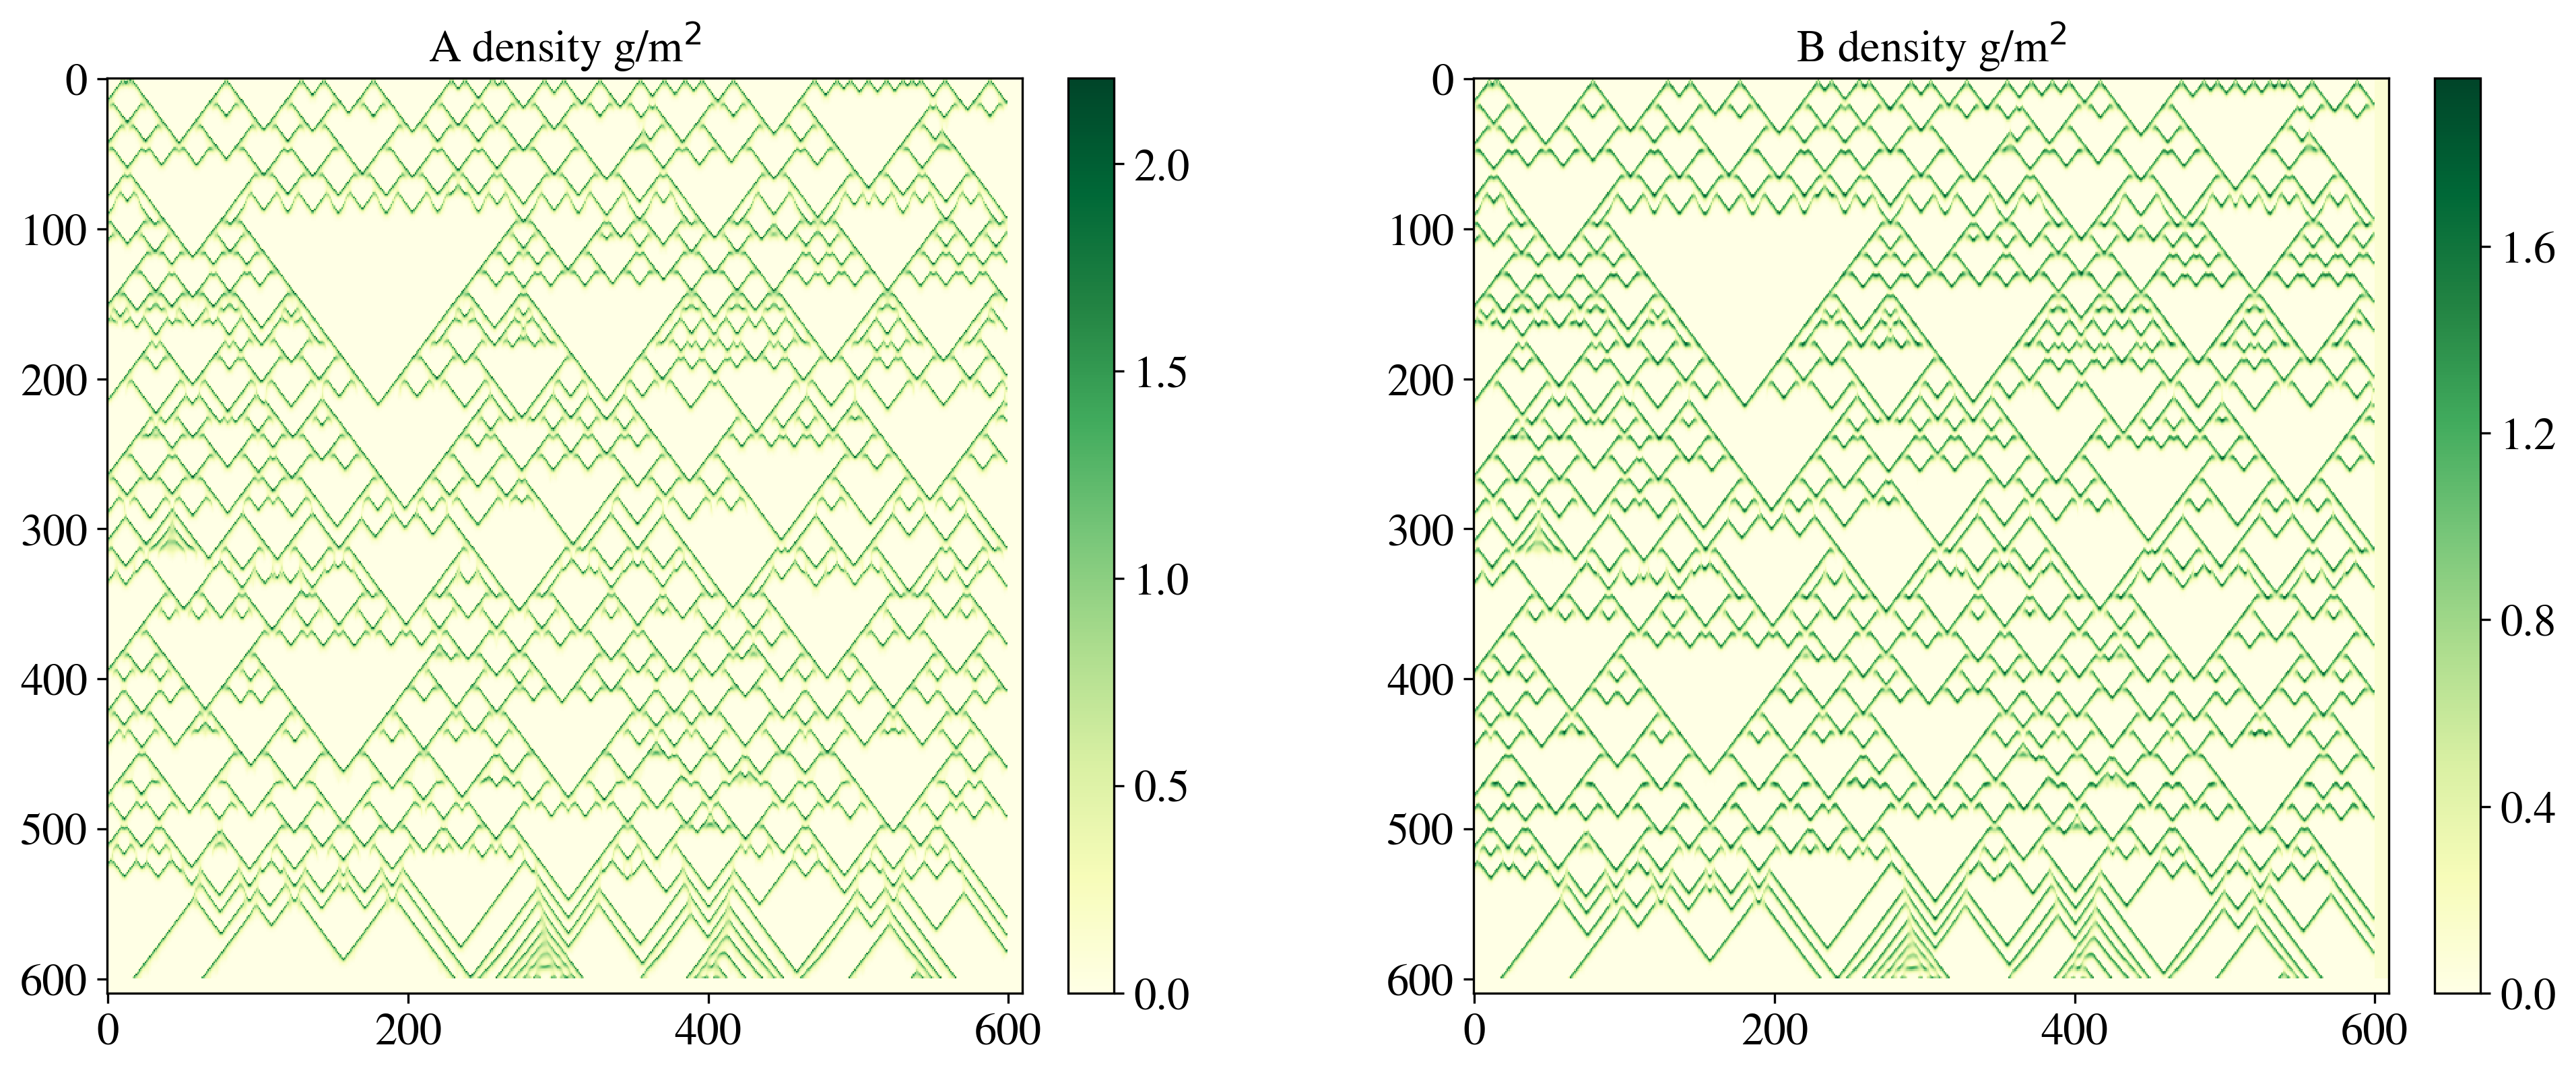

In [8]:
### The Simulation loop
from matplotlib import ticker
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
im0 = ax[0].imshow(Ma,cmap='YlGn');#, clim=(0,0.1));
ax[0].set_title('A density g/m$^2$');
cbar=plt.colorbar(im0, ax=ax[0],fraction=0.046,pad=0.04);
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

im1 = ax[1].imshow(Mb,cmap='YlGn');#, clim=(0,0.5));
ax[1].set_title('B density g/m$^2$');
cbar=plt.colorbar(im1, ax=ax[1],fraction=0.046,pad=0.04);
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()
plt.savefig('6.^>^.png', dpi=350)

© Kang, ECNU-China 2020